In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_df = pd.read_csv('Train.csv')
test_df = pd.read_csv('Test.csv')

In [3]:
train_df

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A
...,...,...,...,...,...,...,...,...,...,...,...
8063,464018,Male,No,22,No,NaN,0.0,Low,7.0,Cat_1,D
8064,464685,Male,No,35,No,Executive,3.0,Low,4.0,Cat_4,D
8065,465406,Female,No,33,Yes,Healthcare,1.0,Low,1.0,Cat_6,D
8066,467299,Female,No,27,Yes,Healthcare,1.0,Low,4.0,Cat_6,B


In [4]:
test_df

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,458989,Female,Yes,36,Yes,Engineer,0.0,Low,1.0,Cat_6
1,458994,Male,Yes,37,Yes,Healthcare,8.0,Average,4.0,Cat_6
2,458996,Female,Yes,69,No,NaN,0.0,Low,1.0,Cat_6
3,459000,Male,Yes,59,No,Executive,11.0,High,2.0,Cat_6
4,459001,Female,No,19,No,Marketing,NaN,Low,4.0,Cat_6
...,...,...,...,...,...,...,...,...,...,...
2622,467954,Male,No,29,No,Healthcare,9.0,Low,4.0,Cat_6
2623,467958,Female,No,35,Yes,Doctor,1.0,Low,1.0,Cat_6
2624,467960,Female,No,53,Yes,Entertainment,NaN,Low,2.0,Cat_6
2625,467961,Male,Yes,47,Yes,Executive,1.0,High,5.0,Cat_4


In [5]:
train_df.isnull().sum()

ID                   0
Gender               0
Ever_Married       140
Age                  0
Graduated           78
Profession         124
Work_Experience    829
Spending_Score       0
Family_Size        335
Var_1               76
Segmentation         0
dtype: int64

In [6]:
test_df.isnull().sum()

ID                   0
Gender               0
Ever_Married        50
Age                  0
Graduated           24
Profession          38
Work_Experience    269
Spending_Score       0
Family_Size        113
Var_1               32
dtype: int64

In [8]:
train_df = train_df.fillna(method='ffill')
test_df = test_df.fillna(method='ffill')

In [9]:
train_df.isnull().sum()

ID                 0
Gender             0
Ever_Married       0
Age                0
Graduated          0
Profession         0
Work_Experience    0
Spending_Score     0
Family_Size        0
Var_1              0
Segmentation       0
dtype: int64

In [10]:
test_df.isnull().sum()

ID                 0
Gender             0
Ever_Married       0
Age                0
Graduated          0
Profession         0
Work_Experience    0
Spending_Score     0
Family_Size        0
Var_1              0
dtype: int64

In [11]:
train_df.describe()

,ID,Age,Work_Experience,Family_Size
count,8068.000000,8068.000000,8068.000000,8068.000000
mean,463479.214551,43.466906,2.618741,2.846678
std,2595.381232,16.711696,3.394284,1.530377
min,458982.000000,18.000000,0.000000,1.000000
25%,461240.750000,30.000000,0.000000,2.000000
50%,463472.500000,40.000000,1.000000,3.000000
75%,465744.250000,53.000000,4.000000,4.000000
max,467974.000000,89.000000,14.000000,9.000000


In [12]:
train_df.columns

Index(['ID', 'Gender', 'Ever_Married', 'Age', 'Graduated', 'Profession',
       'Work_Experience', 'Spending_Score', 'Family_Size', 'Var_1',
       'Segmentation'],
      dtype='object')

In [13]:
train_df['Gender'] = train_df['Gender'].replace({'Male':0,'Female':1})
train_df['Ever_Married'] = train_df['Ever_Married'].replace({'No':0,'Yes':1})
train_df['Graduated'] = train_df['Graduated'].replace({'No':0,'Yes':1})
train_df['Spending_Score'] = train_df['Spending_Score'].replace({'Low':0,'Average':1,'High':2})
train_df['Var_1'] = train_df['Var_1'].replace({'Cat_1':1,'Cat_2':2,'Cat_3':3,'Cat_4':4,'Cat_5':5,'Cat_6':6,'Cat_7':7})
train_df['Profession'] = train_df['Profession'].replace({'Artist':0,'Healthcare':1,'Entertainment':2,'Engineer':3,'Doctor':4,'Lawyer':5,'Executive':6,'Marketing':7,'Homemaker':8})
train_df['Segmentation'] = train_df['Segmentation'].replace({'A':0,'B':1,'C':2,'D':3})

In [14]:
train_df

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,0,0,22,0,1,1.0,0,4.0,4,3
1,462643,1,1,38,1,3,1.0,1,3.0,4,0
2,466315,1,1,67,1,3,1.0,0,1.0,6,1
3,461735,0,1,67,1,5,0.0,2,2.0,6,1
4,462669,1,1,40,1,2,0.0,2,6.0,6,0
...,...,...,...,...,...,...,...,...,...,...,...
8063,464018,0,0,22,0,0,0.0,0,7.0,1,3
8064,464685,0,0,35,0,6,3.0,0,4.0,4,3
8065,465406,1,0,33,1,1,1.0,0,1.0,6,3
8066,467299,1,0,27,1,1,1.0,0,4.0,6,1


In [20]:
train_df = train_df.drop('ID', axis=1)

KeyError: "['ID'] not found in axis"

In [21]:
train_df

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,0,0,22,0,1,1.0,0,4.0,4,3
1,1,1,38,1,3,1.0,1,3.0,4,0
2,1,1,67,1,3,1.0,0,1.0,6,1
3,0,1,67,1,5,0.0,2,2.0,6,1
4,1,1,40,1,2,0.0,2,6.0,6,0
...,...,...,...,...,...,...,...,...,...,...
8063,0,0,22,0,0,0.0,0,7.0,1,3
8064,0,0,35,0,6,3.0,0,4.0,4,3
8065,1,0,33,1,1,1.0,0,1.0,6,3
8066,1,0,27,1,1,1.0,0,4.0,6,1


In [15]:
test_df['Gender'] = test_df['Gender'].replace({'Male':0,'Female':1})
test_df['Ever_Married'] = test_df['Ever_Married'].replace({'No':0,'Yes':1})
test_df['Graduated'] = test_df['Graduated'].replace({'No':0,'Yes':1})
test_df['Spending_Score'] = test_df['Spending_Score'].replace({'Low':0,'Average':1,'High':2})
test_df['Var_1'] = test_df['Var_1'].replace({'Cat_1':1,'Cat_2':2,'Cat_3':3,'Cat_4':4,'Cat_5':5,'Cat_6':6,'Cat_7':7})
test_df['Profession'] = test_df['Profession'].replace({'Artist':0,'Healthcare':1,'Entertainment':2,'Engineer':3,'Doctor':4,'Lawyer':5,'Executive':6,'Marketing':7,'Homemaker':8})

In [22]:
test_df = test_df.drop('ID', axis=1)
test_df

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,1,1,36,1,3,0.0,0,1.0,6
1,0,1,37,1,1,8.0,1,4.0,6
2,1,1,69,0,1,0.0,0,1.0,6
3,0,1,59,0,6,11.0,2,2.0,6
4,1,0,19,0,7,11.0,0,4.0,6
...,...,...,...,...,...,...,...,...,...
2622,0,0,29,0,1,9.0,0,4.0,6
2623,1,0,35,1,4,1.0,0,1.0,6
2624,1,0,53,1,2,1.0,0,2.0,6
2625,0,1,47,1,6,1.0,2,5.0,4


In [23]:
from sklearn.preprocessing import StandardScaler

In [24]:
scaler = StandardScaler()

In [25]:
columns = ['Age', 'Profession', 'Work_Experience', 'Family_Size', 'Var_1']
for column in columns:
    scaler.fit(train_df[[column]])
    train_df[[column]] = scaler.transform(train_df[[column]])
    test_df[[column]] = scaler.transform(test_df[[column]])

In [26]:
train_df

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,0,0,-1.284623,0,-0.573748,-0.476931,0,0.753666,-0.798803,3
1,1,1,-0.327151,1,0.264991,-0.476931,1,0.100192,-0.798803,0
2,1,1,1.408268,1,0.264991,-0.476931,0,-1.206757,0.604363,1
3,0,1,1.408268,1,1.103729,-0.771563,2,-0.553283,0.604363,1
4,1,1,-0.207467,1,-0.154379,-0.771563,2,2.060615,0.604363,0
...,...,...,...,...,...,...,...,...,...,...
8063,0,0,-1.284623,0,-0.993117,-0.771563,0,2.714089,-2.903553,3
8064,0,0,-0.506677,0,1.523098,0.112331,0,0.753666,-0.798803,3
8065,1,0,-0.626361,1,-0.573748,-0.476931,0,-1.206757,0.604363,3
8066,1,0,-0.985413,1,-0.573748,-0.476931,0,0.753666,0.604363,1


In [27]:
test_df

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,1,1,-0.446835,1,0.264991,-0.771563,0,-1.206757,0.604363
1,0,1,-0.386993,1,-0.573748,1.585487,1,0.753666,0.604363
2,1,1,1.527952,0,-0.573748,-0.771563,0,-1.206757,0.604363
3,0,1,0.929532,0,1.523098,2.469380,2,-0.553283,0.604363
4,1,0,-1.464150,0,1.942467,2.469380,0,0.753666,0.604363
...,...,...,...,...,...,...,...,...,...
2622,0,0,-0.865729,0,-0.573748,1.880118,0,0.753666,0.604363
2623,1,0,-0.506677,1,0.684360,-0.476931,0,-1.206757,0.604363
2624,1,0,0.570480,1,-0.154379,-0.476931,0,-0.553283,0.604363
2625,0,1,0.211428,1,1.523098,-0.476931,2,1.407141,-0.798803


In [31]:
X = train_df.drop('Segmentation', axis=1)
y = train_df['Segmentation']

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=101)

In [51]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [53]:
error = []
for k in range(1,30):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    pred = model.predict(X_val)
    err = 1-accuracy_score(y_val, pred)
    error.append(err)

C:\Users\chour\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\chour\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\chour\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\chour\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

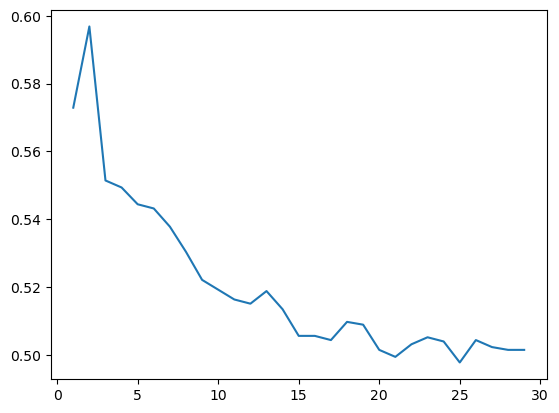

In [60]:
plt.plot(np.arange(1,30), error)

In [61]:
k = 15

In [62]:
final_model = KNeighborsClassifier(n_neighbors=k)
final_model.fit(X, y)

KNeighborsClassifier(n_neighbors=15)

In [64]:
pd.DataFrame(final_model.predict(test_df))

C:\Users\chour\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


,0
0,1
1,1
2,1
3,2
4,3
...,...
2622,3
2623,0
2624,0
2625,1


In [65]:
import joblib

In [66]:
joblib.dump(final_model, 'final_model.pkl')

['final_model.pkl']

In [67]:
X.columns

Index(['Gender', 'Ever_Married', 'Age', 'Graduated', 'Profession',
       'Work_Experience', 'Spending_Score', 'Family_Size', 'Var_1'],
      dtype='object')

In [68]:
joblib.dump(list(X.columns), 'columns.pkl')

['columns.pkl']